In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import os
import sys
import copy

# Add src to path
sys.path.append("src")
from otsu import otsu
from otsu import get_histogram

## Jupyter notebooks settings.

# Reload modules before executing each cell.
%load_ext autoreload
%autoreload 2 

# Introduction

In this lab  we enhance the image by using Otsu's thresholding.

## Theory and implementation


## Code organization
**Input**: `data/input`

**Output**: `data/output`

**Source code**: `src`



### A note on notation:
$I_i$ is the $i$-th image and $F_j$ is the DFT $j$-th image.

# Result

## Q1 & Q2.

#### Import data and apply the manipulation from problem statement.

In [2]:
# Read input.
I1 = cv.imread('data/input/palmleaf1.png')
I2 = cv.imread('data/input/palmleaf2.png')

#### Plot the images.

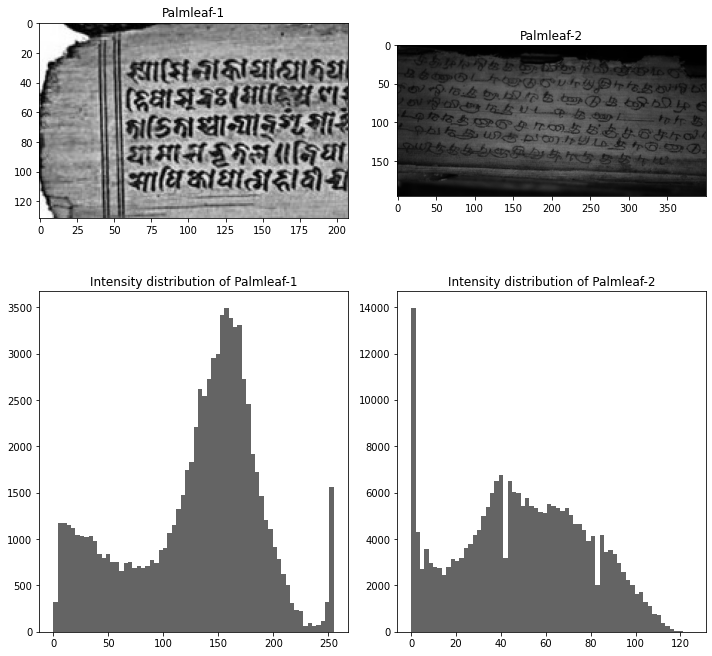

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(I1)
axs[0, 1].imshow(I2)
axs[1, 0].hist(I1.flatten(), bins=64, color='#646464')
axs[1, 1].hist(I2.flatten(), bins=64, color='#646464')
axs[0, 0].set_title('Palmleaf-1')
axs[0, 1].set_title('Palmleaf-2')
axs[1, 0].set_title('Intensity distribution of Palmleaf-1')
axs[1, 1].set_title('Intensity distribution of Palmleaf-2')
fig.tight_layout()

## Get threshold value

In [4]:
H1 = get_histogram(I1)
t1, between_devs_1 = otsu(H1)
H2 = get_histogram(I2)
t2, between_devs_2 = otsu(H2)

print("Threshold for image-1: ", t1)
print("====")
print("Threshold for image-2: ", t2)

3567407.0
27456.0
range:  0 255
27456.0
3897883.0
78400.0
range:  0 125
78400.0
Threshold for image-1:  104
====
Threshold for image-2:  46


In [13]:
len(between_devs_1)

255

In [5]:
clipped_I1 = copy.deepcopy(I1)
clipped_I2 = copy.deepcopy(I2)
# Apply threshold
clipped_I1[I1 > t1] = 255
clipped_I1[I1 <= t1] = 0

clipped_I2[I2 > t2] = 255
clipped_I2[I2 <= t2] = 0

#### Plot the results

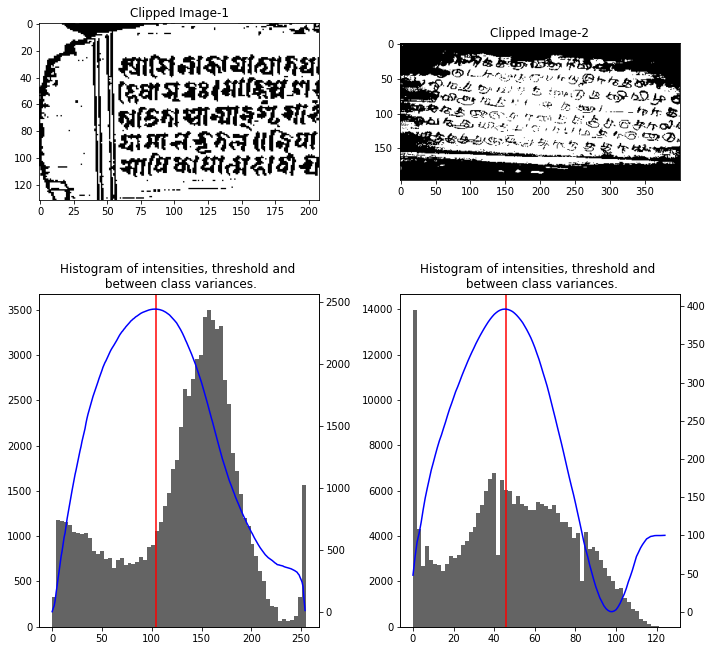

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(clipped_I1)
axs[0, 0].set_title("Clipped Image-1")
axs[0, 1].imshow(clipped_I2)
axs[0, 1].set_title("Clipped Image-2")

axs[1, 0].hist(I1.flatten(), bins=64, color='#646464');
axs[1, 0].axvline(x = t1, color='red')
n1 = len(between_devs_1)
axs_1 = axs[1, 0].twinx()
axs_1.plot(np.linspace(0, n1-1, n1), between_devs_1, 'blue')
axs[1, 0].set_title("Histogram of intensities, threshold and \n between class variances.")

axs[1, 1].hist(I2.flatten(), bins=64, color='#646464');
n2 = len(between_devs_2)
axs_2 = axs[1, 1].twinx()
axs_2.plot(np.linspace(0, n2-1, n2), between_devs_2, 'blue')
axs[1, 1].set_title("Histogram of intensities, threshold and \n between class variances.")
axs[1, 1].axvline(x = t2, color='red')
fig.tight_layout()